In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datascience import *
%matplotlib inline
plt.style.use('seaborn-muted')
mpl.rcParams['figure.figsize'] = (10.0, 10.0)

# Income Inequality Historically

<!-- Written by Amal Bhatnagar -->

In the last chart on the previous page, you may have noticed that income inequality was rising in the United States in the last few decades. We will examine this in more detail, and also observe global trends in inequality.

## The United States

Let's look at historical trends of income inequality in the US over the last 100 years. The data has been collected from [The World Inequality Database](https://wid.world/), which is co-directed by Berkeley Economics professors Emanuel Saez and Gabriel Zucman. Specifically, we will observe income distributions for the bottom 50 percent, top 10 percent, and top 1 percent.

In [14]:
us_hist = Table.read_table("US_inequality.csv")
us_hist.show(5)

Percentile,Year,Income Share
p90p100,1913,0.4231
p90p100,1914,0.4295
p90p100,1915,0.4219
p90p100,1916,0.4439
p90p100,1917,0.449


In [15]:
us_hist.take(np.arange(100,105))

Percentile,Year,Income Share
p90p100,2013,0.4632
p90p100,2014,0.4702
p0p50,1913,nan
p0p50,1914,nan
p0p50,1915,nan


Let's begin with some data cleaning: it seems like our 3 brackets are 'vertically stacked' on top of each other. Instead, we would like a table with 5 columns: `Year`, `bottom 50% income share`, `top 10% income share`, and `top 1% income share`.

In [16]:
bottom_50_us = us_hist.where("Percentile", "p0p50").drop("Percentile").relabeled("Income Share", "Bottom 50% Share")
top_10_us = us_hist.where("Percentile", "p90p100").drop("Percentile").relabeled("Income Share", "Top 10% Share")
top_1_us = us_hist.where("Percentile", "p99p100").drop("Percentile").relabeled("Income Share", "Top 1% Share")
us_hist_joined = bottom_50_us.join("Year", top_10_us).join("Year", top_1_us)
us_hist_joined

Year,Bottom 50% Share,Top 10% Share,Top 1% Share
1913,nan,0.4231,0.1884
1914,nan,0.4295,0.1933
1915,nan,0.4219,0.187
1916,nan,0.4439,0.2064
1917,nan,0.449,0.2014
1918,nan,0.4364,0.1895
1919,nan,0.4543,0.2101
1920,nan,0.4344,0.184
1921,nan,0.4653,0.181
1922,nan,0.4554,0.1763


Oh no, there are some `nan` values! NaN (not a number) values are very common in real world datasets: often, we may not have some observations simply because no data was collected, or perhaps the data collected was faulty. Sometimes, we can try to impute or replace NaN values in order to avoid having gaps in our data, but for now let's ignore NaNs and when plotting to see what's going on:

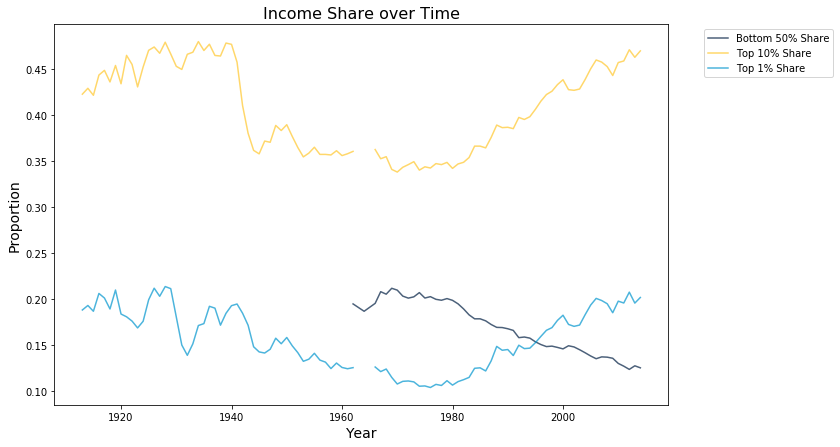

In [17]:
# mpl.rcParams['figure.dpi'] = 120
us_hist_joined.plot("Year", width=11, height=7)
plt.title("Income Share over Time", fontsize = 16)
plt.ylabel("Proportion", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.show()

# Income Inequality for the Rest of the World

Now let's examine the trends of income inequality in other parts of the world.

In [18]:
world_hist = Table.read_table("World_Inequality.csv")
bottom_50_world = world_hist.where("Percentile", "p0p50").drop("Percentile")
top_10_world = world_hist.where("Percentile", "p90p100").drop("Percentile")
top_1_world = world_hist.where("Percentile", "p99p100").drop("Percentile")
top_10_world

Year,Europe,World,Russia,China,USA,India,Brazil
1980,0.2846,0.4898,0.2102,0.2724,0.3424,0.315,nan
1981,0.283,0.4888,nan,0.2768,0.3472,0.3071,nan
1982,0.2819,0.4815,nan,0.2809,0.349,0.3005,nan
1983,0.2823,0.4893,nan,0.2819,0.3542,0.3528,nan
1984,0.2845,0.4916,nan,0.2867,0.3666,0.3338,nan
1985,0.2871,0.4971,0.2237,0.2952,0.3666,0.3479,nan
1986,0.2899,0.5008,nan,0.2987,0.3647,0.3507,nan
1987,0.2942,0.5043,nan,0.2974,0.3761,0.3447,nan
1988,0.2991,0.5078,0.2238,0.301,0.3895,0.3538,nan
1989,0.3024,0.5108,0.2372,0.3067,0.3867,0.3541,nan


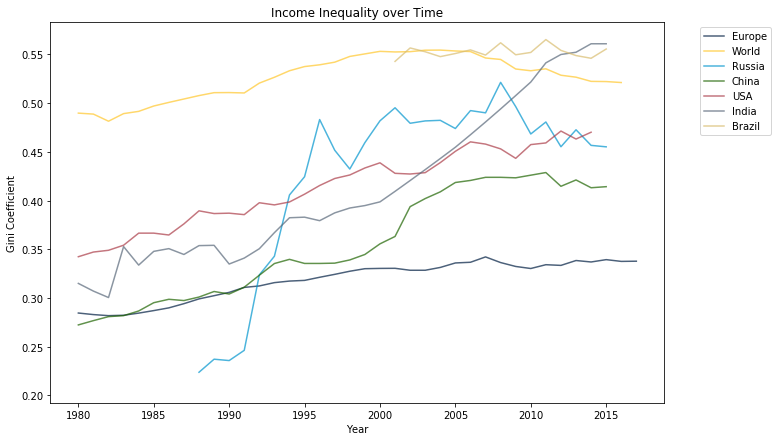

In [19]:
top_10_world.plot("Year", width=11, height=7)
plt.ylabel("Gini Coefficient")
plt.title("Income Inequality over Time");

Just like the US, it seems global inequality has been rising around the world, especially in China, India, Russia, and across Europe. However, in absolute terms, the level of income inequality in Europe is much lower than that in the United States. 

Also look at Russia: income inequality spiked up around 1991. This was likely caused by the fall of the USSR: the failing Soviet state left the ownership of state assets uncontested, which allowed former USSR officials to acquire state property through informal deals. This led to the rise of many Russian oligarchs - those who rapidly accumulated wealth during the era of Russian privatization directly follwing the dissolution of the Soviet Union.

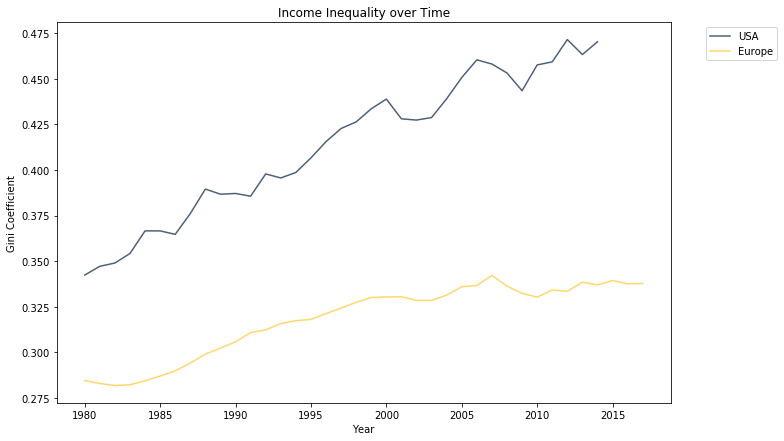

In [20]:
top_10_world.select("Year", "USA", "Europe").plot("Year", width=11, height=7)
plt.ylabel("Gini Coefficient")
plt.title("Income Inequality over Time");

##  The Elephant Graph

```{figure} elephant_curve.jpg
---
width: 500px
name: elephant-curve
---
The elephant curve {cite}`10inequality-elephantCurve`
```

The elephant curve is a graph that shows the real income growth per adult across each income group’s percentile around the world. 

There are 3 key features of the elephant curve: a hump for the world’s poorest, valley for the middle class, and trunk for the upper class. The thump is made of the world’s poorest countries, most likely those from developing countries. The valley comprises the working class from the developed world and upper class from developing countries. The trunk is made of people from the upper class from developed countries. The hump and valley indicate growth among emerging countries, and the top global 1%’s growth is higher than any other income group, thus explaining the positively sloped shape of the trunk. 


A study done by the Brookings Institution] found that “poorer countries, and the lower income groups within those countries, have grown most rapidly in the past 20 years” {cite}`10inequality-brookings`. This supports the World Bank’s claim that inequality between countries and within countries is decreasing. The Brookings Institution used only household surveys, however, which usually excludes the top and bottom percentile of the population, due to non-response bias. Still, the study is useful in corroborating the trends and growth in global income inequality. 

# Factors that Affect Income Inequality

Economists have isolated multiple factors that influence a country's income inequality
- top marginal tax rates
- unemployment rates
- population growth

We will look at each of these scenarios independently and see its overall trends

## Top marginal tax rates

Let's also take a look at the top marginal tax rates in the United States throughout this time. Overall, the United States (and most of the rest of the world) has a progressive tax system, which means that the more income you earn, the higher percentage you will be taxed at. A good way to reduce income inequality is through progressive taxation; having the richer paying a higher portion of their income will help increase equality. Currently, the top marginal tax rate is 37%, as we can see in the table below.

```{figure} MTR.png
---
width: 500px
name: irs
---
Marginal tax rates. Image from the IRS
```

The top marginal tax rate only applies to the portion of your income above a certain income level. For example, if you earned 19501 dollars in 2019, then you will pay 1940 dollars plus 12% of $19501-19401$, i.e. 12 dollars. For another example, if you earned 80000 dollars, then you will pay $9086 + 0.22(80000-78950) = 9317$ dollars in tax, effectively a $\frac{9317}{80000} = 11.6\%$ tax rate.

In general, the idea is you will pay a lower tax rate for your first $x$ dollars, but a higher rate for dollars earned over $x$.

Now let's look at the historical trends in marginal top tax rates, which is the % taxed at the highest tax bracket.

In [21]:
toptax = Table.read_table("toptaxrate.csv")
toptax

Year,Tax Rate (%)
1913,7
1914,7
1915,7
1916,15
1917,67
1918,77
1919,73
1920,73
1921,73
1922,58


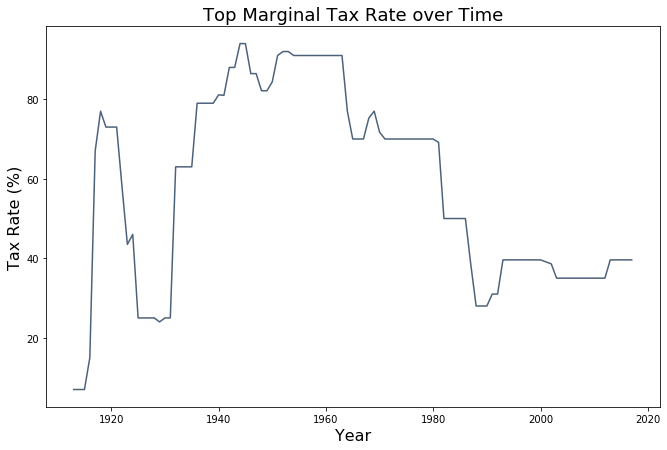

In [22]:
# mpl.rcParams['figure.dpi'] = 120
toptax.plot(0,1, width=11, height=7)
plt.title("Top Marginal Tax Rate over Time", fontsize = 18)
plt.show()

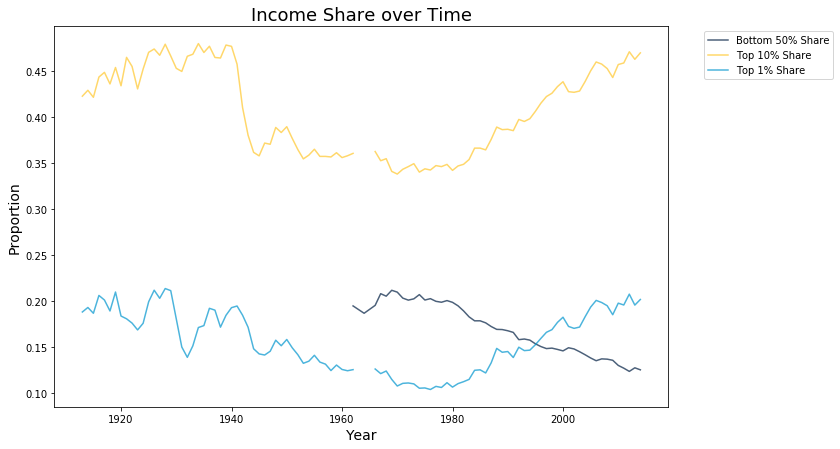

In [23]:
# mpl.rcParams['figure.dpi'] = 120
us_hist_joined.plot("Year", width=11, height=7)
plt.title("Income Share over Time", fontsize = 18)
plt.ylabel("Proportion", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.show()

This graph depicts income inequality decreasing between 1910 and 1970 and increasing from 1970 to present. 

In 1913, Congress implemented the current income tax to promote equality. Originally meant to help compensate for revenue lost from reducing high tariffs, the new policy essentially made the top 1% start contributing to taxes. Additionally, the top marginal tax rate increased from 7% in 1913 to 73% in 1918, thus helping reduce income inequality. Right before the Great Depression, income inequality peaked, where the richest 1% possessed 19.6% of all income. During the Great Depression, top marginal tax rates increased, peaking at 94% in 1944. The top marginal tax rate decreased but remained high over subsequent decades, where it was 70% in 1965 and 50% in 1982. These high top marginal tax rates are correlated with low income inequality. During the Great Depression, the richest 1% had about 15% of total income. For the 10 years after the Great Depression, the top 1% had below 10% of total income and 8% for the 30 years afterwards. This period was known as the Great Compression, as income differentials between the top 1% and the rest of the country decreased.

In the 1970s, the economy took a turn for the worse with high unemployment and inflation (stagflation) and low growth. In order to stimulate economic growth, the government reduced top marginal tax rates (70% to 38.5% in 1980s), deregulated corporate institutions, and attacked labor union memberships (membership decreased by half within 30 years). Although these policies improved economic growth, it resulted in higher income inequality.

The graph below better shows that the share of income earned by the bottom 50% percentile steadily decreased, while the share earned by the top 1% increased steadily. This means that the top 1% has more wealth than the entire bottom 50% of the population. Suppose a class of 100 people has \\$100 in aggregate. In a world with perfect equality, each person would have \\$1. With this current level of income inequality, one person would have more wealth than 50 people combined. 

The media continues to report on the nation's significant income disparity. [The Washington Post wrote a story](https://www.washingtonpost.com/business/2019/09/26/income-inequality-america-highest-its-been-since-census-started-tracking-it-data-show/) and found that “The number of families earning \\$15,000 or less has fallen since 2007, according to the latest census data, while the number of households bringing in \\$250,000 a year or more has grown more than 15 percent.” 

Can we conclude that high marginal tax rates lead to low income inequality but slow economic growth?

## Unemployment rates

Economists believe that unemployment is one of the leading factors that leads to income inequality. When looking at what influences the Gini coefficient, a paper from [Princeton](https://rpds.princeton.edu/sites/rpds/files/media/menendez_unemployment_ar.pdf) found that the unemployment rate had the largest effect on the income inequality rates

Below, we look at the unemployment rates for the past 20 years across many different countries. These are the same countries and regions that we will further study below. 

In [24]:
unemployment = Table.read_table("Unemployment.csv")
unemployment

Year,World,India,Europe,Brazil,United States,China,Russia
1991,4.76,5.45,8.1,6.37,6.8,2.37,5.14
1992,4.9,5.5,8.8,6.42,7.5,2.37,5.18
1993,5.21,5.61,10.14,6.03,6.9,2.69,5.88
1994,5.43,5.63,10.87,6.23,6.1,2.9,8.13
1995,5.58,5.64,10.65,6.42,5.6,3,9.45
1996,5.66,5.65,10.78,7.25,5.4,3.12,9.66
1997,5.69,5.64,10.76,8.16,4.9,3.23,11.81
1998,5.83,5.63,10.55,9.42,4.5,3.24,13.26
1999,5.94,5.69,9.82,10.21,4.2,3.25,13.04
2000,5.77,5.66,8.88,9.9,4,3.26,10.58


As we can see from the graph, the unemployment rates for China, India and the rest of the world have stayed somewhat steady. On the other hand, Brazil, the US, Russia and Europe are encountering drastically different unemployment situations than before.

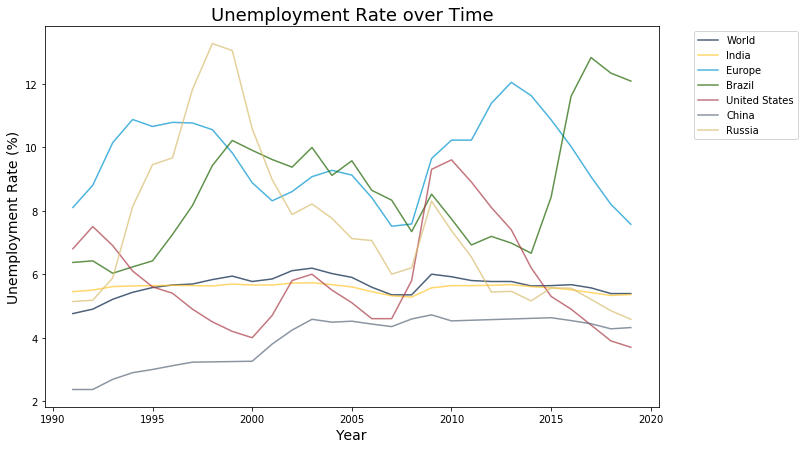

In [25]:
# mpl.rcParams['figure.dpi'] = 120
unemployment.plot("Year", width=11, height=7)
plt.ylabel("Unemployment Rate (%)", fontsize = 14)
plt.xlabel("Year", fontsize =14)
plt.title("Unemployment Rate over Time", fontsize = 18)
plt.show()

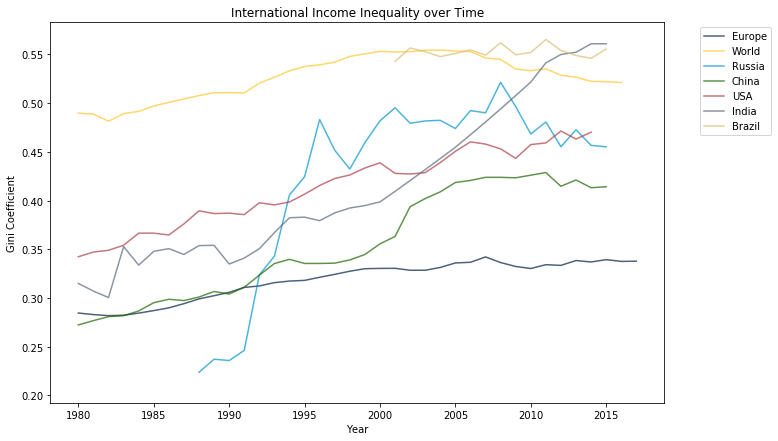

In [27]:
top_10_world.plot("Year", width=11, height=7)
plt.ylabel("Gini Coefficient")
plt.title("International Income Inequality over Time")
plt.show()

The graphs above show a positive correlation between unemployment and income inequality. As unemployment increases, income inequality also increases. In 2011, Hanan Morsy, an Egyptian economist who serves as the Director of Macroeconomic Policy, Forecasting and Research at the African Development Bank, actually researched this topic {cite}`10inequality-morsy`. Her group examined the member nations of the Organization  for  Economic  Cooperation  and  Development  (OECD) between 1980 and 2005. She found that specific groups that were vulnerable to the economic shocks that led to an increase in income inequality:
- young workers
- low-skilled workers
- workers who had been out of work for a long time

Her solution was to increase job creation opportunities for temporary, recently fired, and recently hired workers, provide job assistance and training to prevent long-term unemployment, and improve incentives for working by aligning incentives with productivity of labor. Morsy's research found that the most vulnerable groups to economic shocks were young, low-skilled and temporary workers. Creating opportunities for these different demographics would help them be more protected from potential shocks and thus decrease income inequality.

## Population growth

As the number of people in a country's population increase, it becomes more difficult for a country to distribute its public goods to everyone. This leads to many social consequences in which resources are not fairly distributed to all members of the population, cause inaccessibility for different parts of the population

The table below shows how the population growth has changed for the same countries we saw above. We are only looking at data for the past 10 years.

In [30]:
pop_growth = Table.read_table("Population Growth.csv")
pop_growth

Year,World,India,Brazil,United States,China,Russia
1980,1.77,2.34,2.39,0.94,1.42,0.67
1981,1.77,2.35,2.38,0.94,1.39,0.68
1982,1.77,2.36,2.37,0.94,1.37,0.69
1983,1.78,2.35,2.33,0.94,1.41,0.7
1984,1.8,2.32,2.27,0.94,1.51,0.71
1985,1.82,2.29,2.18,0.94,1.65,0.72
1986,1.84,2.25,2.1,0.94,1.81,0.73
1987,1.85,2.21,2.01,0.94,1.93,0.72
1988,1.84,2.17,1.94,0.95,1.94,0.68
1989,1.79,2.13,1.88,0.95,1.81,0.58


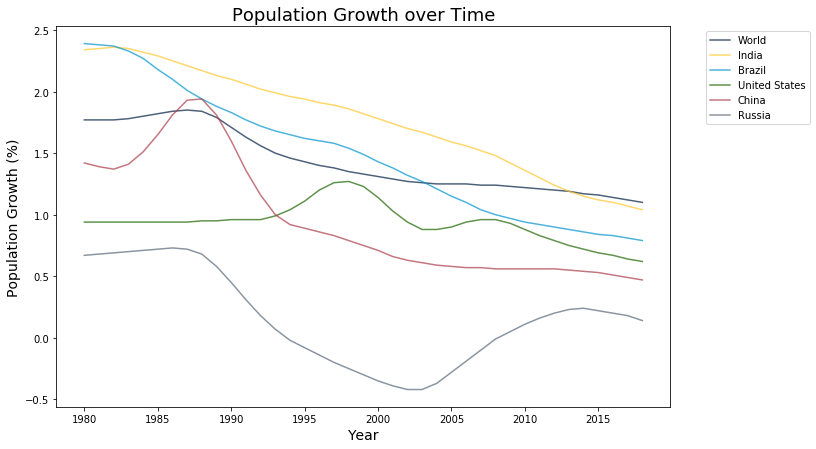

In [31]:
pop_growth.plot("Year", width=11, height=7)
plt.title("Population Growth over Time", fontsize = 18)
plt.ylabel("Population Growth (%)", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.show()

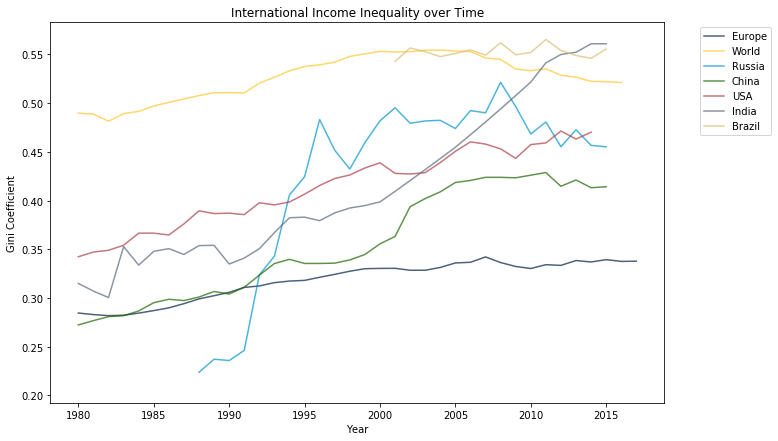

In [32]:
top_10_world.plot("Year", width=11, height=7)
plt.ylabel("Gini Coefficient")
plt.title("International Income Inequality over Time")
plt.show()

The graphs above show that most countries high population growth between 1-2% during the 1980's. The effects of this can be seen in the rising income inequality during the 90's.  

Recent research by University of Toronto's Marijn Bolhuis and Univeristy of Oxford's Alexandra de Pleijt shows that there is a strong correlation between a country's population growth (measured by birth rates) and its income inequality {cite}`10inequality-popGrowth`. Their most recent study in 2016 analyzed income inequality and birth rates data between 1870 and 2000 across 67 countries. They concluded that if a country had 50% higher income inequality, then that country's birth rate would be about twice as high as another country with the same level of economic development. Bolhuis says that these higher birth rates mean that economic growth has to be equal to or greater than the birth rate to offset the implications of higher birth rates. 

This is part of a larger debate about the relationship between birth rates and income inequality. Economist Thomas Piketty finds that low birth rates, rather than high birth rates, are causing today's income inequality. With lower birth rates, fewer children per couple are being borne, so these children get more of their parents' inheritance.